In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('django-packages.csv', sep=';')

categories = ['apps', 'frameworks']

removed_packages = [
    'django/django', # Django framework
]

df = df[~df['repo_id'].isin(removed_packages)]
df = df[(df['has_valid_repo_url']) & (df['has_valid_repo'])]
df = df[df['dp_category'].isin(categories)]
df = df[df['repo_last_modified'] >= '2018-01-01T00:00:00:000']

starts_median = np.median(np.array(df['repo_stars'].values))
df = df[df['repo_stars'] >= starts_median]

df.sort_values(by=['dp_usage_count'], ascending=False)

,dp_slug,dp_category,dp_grids,dp_usage_count,has_valid_repo_url,dp_repo_url,has_valid_repo,platform,repo_id,repo_stars,repo_last_modified,repo_forks,repo_open_issues,repo_topics
1068,django-debug-toolbar,apps,"this-site,developer-tools,data-tools",531,True,https://github.com/django-debug-toolbar/django...,True,github,django-debug-toolbar/django-debug-toolbar,6714.0,2021-11-09T10:21:46:000,950.0,88.0,NaN
2674,django-rest-framework,apps,"rest,api,this-site,django-rest-framework,drf-a...",344,True,https://github.com/tomchristie/django-rest-fra...,True,github,tomchristie/django-rest-framework,22187.0,2021-11-09T14:51:22:000,5932.0,259.0,"python,django,api,rest"
1292,django-extensions,apps,"this-site,developer-tools,fields,shells,cron",294,True,https://github.com/django-extensions/django-ex...,True,github,django-extensions/django-extensions,5552.0,2021-11-08T14:03:01:000,1057.0,123.0,NaN
2621,django-registration,apps,"authentication,security,django-registration,re...",241,True,https://github.com/ubernostrum/django-registra...,True,github,ubernostrum/django-registration,744.0,2021-11-09T11:17:39:000,236.0,0.0,"python,django,user-management,user-registration"
2263,django-oscar,frameworks,ecommerce,235,True,https://github.com/django-oscar/django-oscar,True,github,django-oscar/django-oscar,5119.0,2021-11-08T22:26:01:000,1881.0,128.0,"django,ecommerce,django-oscar,oscar"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2937,django-simple-bulma,apps,NaN,0,True,https://github.com/python-discord/django-simpl...,True,github,python-discord/django-simple-bulma,101.0,2021-09-27T17:02:36:000,14.0,5.0,NaN
2941,django-simple-email-confirmation,apps,"email,profiles,custom-user-models",0,True,https://github.com/mfogel/django-simple-email-...,True,github,mfogel/django-simple-email-confirmation,173.0,2021-10-12T09:14:49:000,62.0,14.0,NaN
2945,django-simple-friends,apps,"social,relationships",0,True,https://github.com/muhuk/django-simple-friends,True,github,muhuk/django-simple-friends,78.0,2020-03-30T15:54:56:000,30.0,8.0,NaN
1063,django-debug-logging,apps,logging,0,True,https://github.com/lincolnloop/django-debug-lo...,True,github,lincolnloop/django-debug-logging,104.0,2020-05-27T07:59:32:000,4.0,0.0,NaN


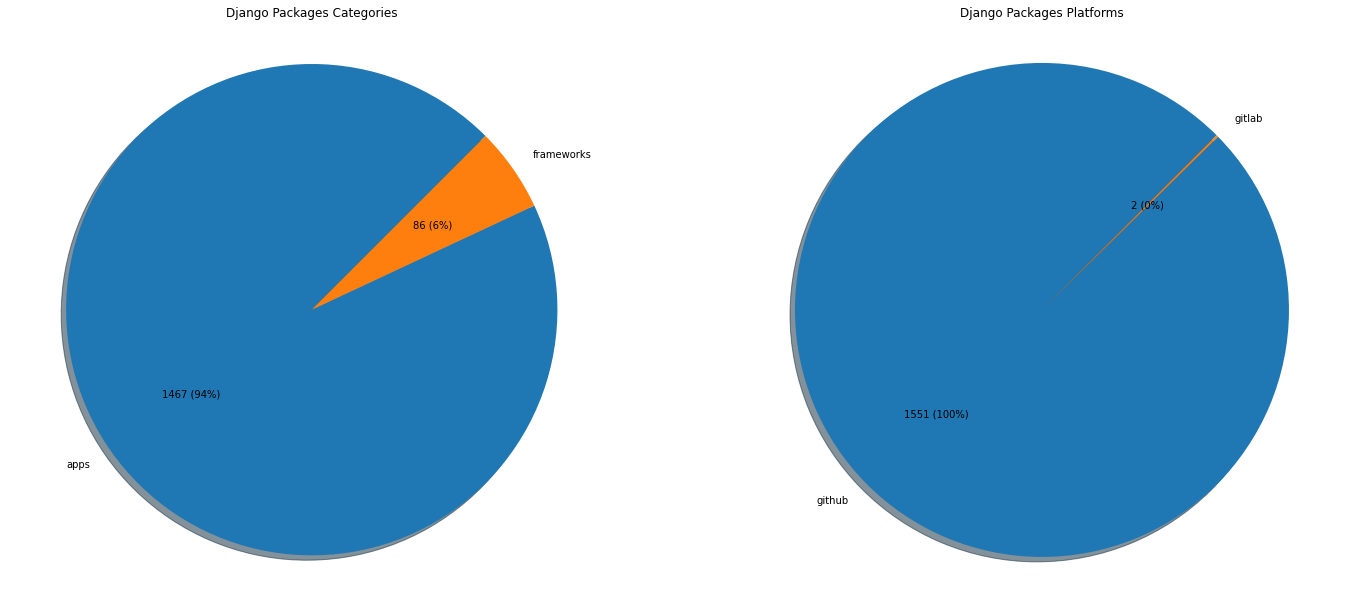

In [2]:
def get_pie_label(p, total):
    absolute = '{:.0f}'.format(p * total / 100)
    percentage = '{0:.0%}'.format(p/100.0)

    return '{} ({})'.format(absolute, percentage)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 10))
fig.set_facecolor('white')

categories = 'apps', 'frameworks'

sizes = [
    len(df[df['dp_category'] == categories[0]]),
    len(df[df['dp_category'] == categories[1]]),    
]

ax1.pie(sizes, labels=categories, autopct=lambda p: get_pie_label(p, len(df)), shadow=True, startangle=45)
ax1.axis('equal')
ax1.set_title('Django Packages Categories\n')

platforms = 'github', 'gitlab'

sizes = [
    len(df[df['platform'] == platforms[0]]),
    len(df[df['platform'] == platforms[1]]),    
]

ax2.pie(sizes, labels=platforms, autopct=lambda p: get_pie_label(p, len(df)), shadow=True, startangle=45)
ax2.axis('equal')
ax2.set_title('Django Packages Platforms\n')

plt.show()

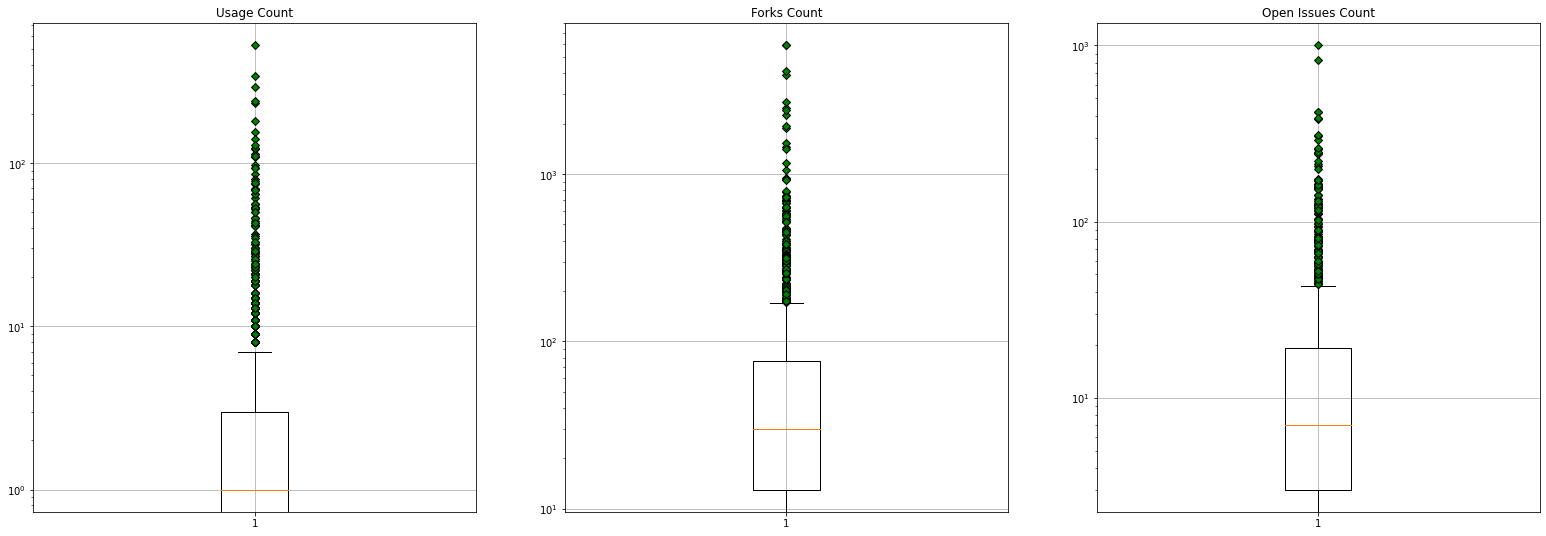

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(27, 9))

ax1.boxplot(df['dp_usage_count'].values, flierprops=dict(markerfacecolor='g', marker='D'))
ax1.set_title('Usage Count')
ax1.set_yscale('log')
ax1.grid()

ax2.boxplot(df['repo_forks'].values, flierprops=dict(markerfacecolor='g', marker='D'))
ax2.set_title('Forks Count')
ax2.set_yscale('log')
ax2.grid()

ax3.boxplot(df['repo_open_issues'].values, flierprops=dict(markerfacecolor='g', marker='D'))
ax3.set_title('Open Issues Count')
ax3.set_yscale('log')
ax3.grid()


plt.show()

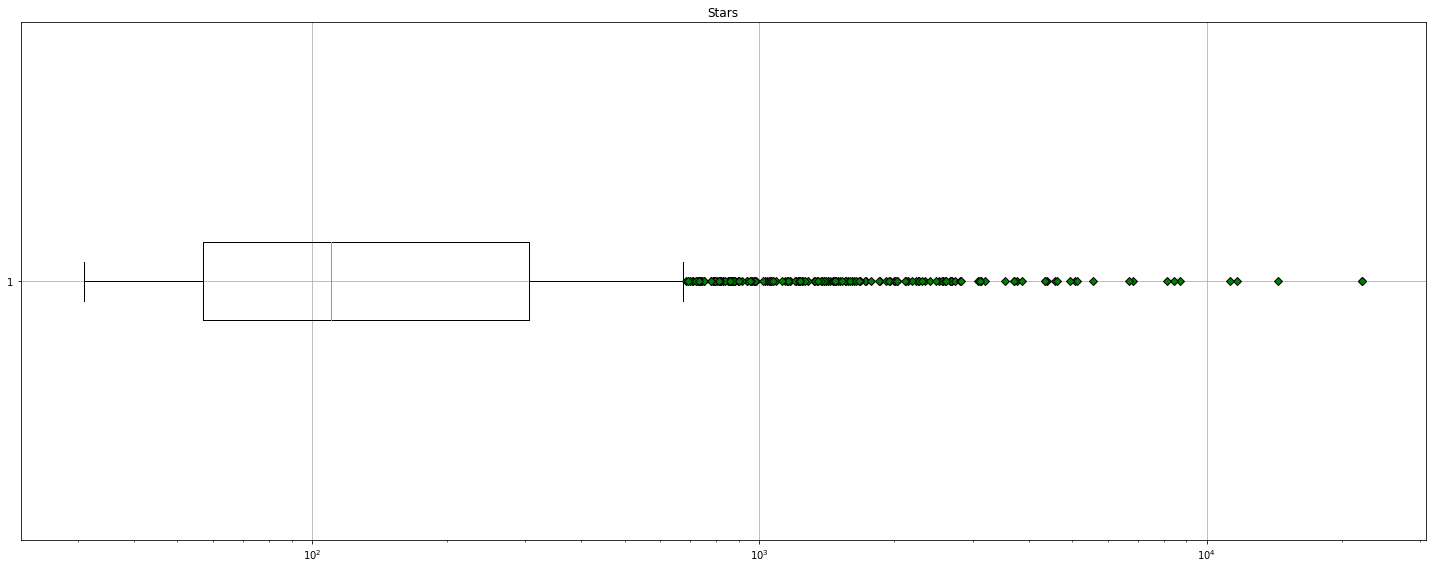

In [4]:
fig, ax = plt.subplots(figsize=(20, 8))

repo_stars = df['repo_stars'].values

ax.boxplot(repo_stars, flierprops=dict(markerfacecolor='g', marker='D'), vert=False)
ax.set_title('Stars')

plt.xscale('log')
plt.tight_layout()
plt.grid()

plt.show()